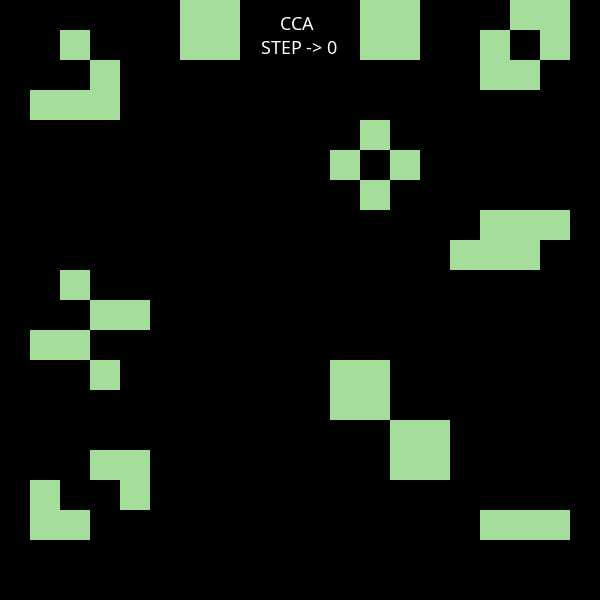

In [1]:
# CCA <Classic cellular automata in 2-dimention>
# Conway's Game of Life

#--- import
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

#--- placing object on the grid
def initialize_grid(size):
    grid = np.zeros((size, size), dtype=int)
    
    # glider
    glider = np.array([[0, 1, 0],
                       [0, 0, 1],
                       [1, 1, 1]])
    grid[1:4, 1:4] = glider
        
    # beacon <oscillator>
    beacon = np.array([[1, 1, 0, 0],
                       [1, 1, 0, 0],
                       [0, 0, 1, 1],
                       [0, 0, 1, 1]])
    grid[12:16, -9:-5] = beacon

    # block <strictStillLife>
    block =  np.array([[1, 1],
                       [1, 1]])
    grid[0:2, -14:-12] = block
    grid[0:2, -8:-6]   = block

    # toad <oscillator>
    toad = np.array([[0, 1, 1, 1],
                     [1, 1, 1, 0]])
    grid[7:9, -5:-1] = toad

    # tub <strictStillLife>
    tub    = np.array([[0, 1, 0],
                       [1, 0, 1],
                       [0, 1, 0]])
    grid[4:7, -9:-6] = tub

    # ship <strictStillLife>
    ship   = np.array([[0, 1, 1],
                       [1, 0, 1],
                       [1, 1, 0]])
    grid[0:3, -4:-1] = ship

    # airCarrier <strictStillLife>
    airCarrier = np.array([[0, 0, 1, 1],
                           [1, 0, 0, 1],
                           [1, 1, 0, 0]])
    grid[15:18, 1:5] = airCarrier

    # clock <oscillator>
    clock   = np.array([[0, 1, 0, 0],
                        [0, 0, 1, 1],
                        [1, 1, 0, 0],
                        [0, 0, 1, 0]])
    grid[9:13, 1:5] = clock

    # blinker <oscillator>
    blinker = np.array([[0, 0, 0],
                        [1, 1, 1],
                        [0, 0, 0]])
    grid[16:19, -4:-1] =  blinker

    return grid

#--- interaction
def update_grid(grid):
    new_grid = grid.copy()
    for i in range(1, grid.shape[0] - 1):
        for j in range(1, grid.shape[1] - 1):
            total = (grid[i-1, j-1] + grid[i-1, j] + grid[i-1, j+1] +
                     grid[i, j-1] + grid[i, j+1] +
                     grid[i+1, j-1] + grid[i+1, j] + grid[i+1, j+1])
            if grid[i, j] == 1:
                if total < 2 or total > 3:
                    new_grid[i, j] = 0
            else:
                if total == 3:
                    new_grid[i, j] = 1
    return new_grid

#--- init
size  = 20   # square with "size" cells per side
steps = 200  # no more moving objects in the 225th step
grid  = initialize_grid(size)
txtColor  = (255,255,255)
cellColor = (165,222,154)

# animation
grid = initialize_grid(size)  
frames = []

for step in range(steps):
    img = Image.new('RGB', (grid.shape[1], grid.shape[0]), color='black')
    pixels = img.load()
    
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 1:
                pixels[j, i] = cellColor
    
    img = img.resize((600, 600), Image.NEAREST)
    draw = ImageDraw.Draw(img)
    
    # font configuration
    font = ImageFont.truetype("/usr/share/fonts/truetype/NotoSans-Regular.ttf", 18) 
    text = f"    CCA\nSTEP -> {step}"
    text_width, text_height = draw.textbbox((0, 0), text, font=font)[2:4]
    position = ((img.width - text_width) // 2, 10)
    
    draw.text(position, text, fill=txtColor, font=font)
    frames.append(img)
    grid = update_grid(grid)

# save
frames[0].save('CCA_2dim_gameOfLife.gif', save_all=True, append_images=frames[1:], duration=500, loop=0)

# show
from IPython.display import Image as IPImage
IPImage(filename='CCA_2dim_gameOfLife.gif')
